In [1]:
#%pwd

'/home/matt/git/fluffy-bassoon/PraticalDeepLearningForCoders2022/Lesson2'

In [2]:
#%cd Lesson2/

[Errno 2] No such file or directory: 'Lesson2/'
/home/matt/git/fluffy-bassoon/PraticalDeepLearningForCoders2022/Lesson2


In [3]:
#|default_exp app

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

In [5]:
gr.__version__

'4.1.1'

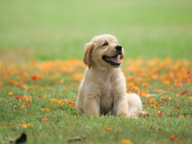

In [20]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [7]:
#|export
learn = load_learner('model.pkl')

In [8]:
%time learn.predict(im)

CPU times: user 1.05 s, sys: 117 ms, total: 1.16 s
Wall time: 1.6 s


('False', tensor(0), tensor([9.9996e-01, 3.8431e-05]))

In [9]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [10]:
classify_image(im)

{'Dog': 0.9999616146087646, 'Cat': 3.84313243557699e-05}

In [23]:
#|export
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']
intf = gr.Interface(fn=classify_image, inputs=gr.Image(width=192, height=192), outputs=gr.Label(), examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [22]:
m = learn.model

In [24]:
ps = list(m.parameters())

In [25]:
ps[1]

Parameter containing:
tensor([ 2.3409e-01,  2.6529e-01, -5.1096e-08,  5.1770e-01,  3.4404e-09,
         2.2428e-01,  4.2192e-01,  1.3153e-07,  2.5058e-01,  1.5152e-06,
         3.1694e-01,  2.5192e-01,  3.7811e-01,  1.0862e-05,  2.7594e-01,
         2.3705e-01,  2.4071e-01,  3.9461e-01,  4.7125e-01,  2.9077e-01,
         2.7314e-01,  2.7967e-01,  2.9065e-01,  2.0608e-01,  2.5806e-01,
         2.7985e-01,  2.9157e-01,  3.1595e-01,  3.8838e-01,  3.0298e-01,
         2.6705e-01,  2.0909e-01,  2.8671e-01,  3.3259e-01,  4.2726e-01,
         3.7320e-01,  7.4804e-08,  1.8987e-01,  1.4740e-08,  2.2228e-01,
         1.7926e-01,  2.4808e-01,  2.7234e-01,  2.6032e-01,  2.9365e-01,
         2.9879e-01,  2.2613e-01,  2.6278e-01,  2.2001e-08,  2.6498e-01,
         2.2155e-01,  2.8343e-01,  3.3179e-01,  2.2790e-01,  3.6549e-01,
         2.1232e-01,  2.3871e-01,  2.5009e-01,  5.2505e-01,  2.4892e-01,
         2.9614e-01,  2.5882e-01,  4.8309e-01,  2.6758e-01],
       requires_grad=True)

In [27]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [29]:
#ps[0]

In [33]:
#export as script
from nbdev.export import nb_export

In [37]:
nb_export('Lesson2_DeployModel.ipynb', 'app')